TASK
построить графики для биржевых котировок (двух акций любых), например за час или ежедневные, 
1) считать, 
2) извлечь столбцы необходимые для работы, 
3) для каждого из столбцов, график, распределение, взаимное рассеивание для двух котировок, гистограмму, ряды, характеристики (среднее, медиана, etc), 
4) построить дополнительный столбец – волатильность volp=(h-l)^2 для цены, построить график волатильности

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy as scp

In [35]:
nvidia = pd.read_csv('NVDA-RM.csv', sep=";")
amd = pd.read_csv('AMD-RM.csv', sep=";")

In [36]:
nvidia.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,20200824,0,37893.0,38218.0,37800.0,38218.0,30
1,20200825,0,38900.0,45000.0,37728.0,39600.0,3058
2,20200826,0,39650.0,39650.0,38271.0,38600.0,1295
3,20200827,0,38489.0,38744.0,37900.0,38222.0,692
4,20200828,0,38102.0,39078.0,37310.0,38900.0,923


In [37]:
amd.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,20200825,0,6254.0,6560.0,6190.0,6549.0,7708
1,20200826,0,6550.0,6676.0,6460.0,6517.0,3635
2,20200827,0,6493.0,6533.0,6234.0,6314.0,2214
3,20200828,0,6250.0,6438.0,6208.0,6277.0,2996
4,20200831,0,6198.0,6889.0,6190.0,6680.0,5407


In [48]:
amd.shape

(64, 7)

In [38]:
nvidia_new = nvidia[['<DATE>','<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>']].copy() 
nvidia_new.head()

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,20200824,37893.0,38218.0,37800.0,38218.0
1,20200825,38900.0,45000.0,37728.0,39600.0
2,20200826,39650.0,39650.0,38271.0,38600.0
3,20200827,38489.0,38744.0,37900.0,38222.0
4,20200828,38102.0,39078.0,37310.0,38900.0


In [60]:
amd_new = amd[['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>']].copy()
amd_new.head()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,6254.0,6560.0,6190.0,6549.0
1,6550.0,6676.0,6460.0,6517.0
2,6493.0,6533.0,6234.0,6314.0
3,6250.0,6438.0,6208.0,6277.0
4,6198.0,6889.0,6190.0,6680.0


(array([ 3.,  5.,  6.,  6., 13., 11.,  9.,  4.,  5.,  2.]),
 array([5623. , 5759.2, 5895.4, 6031.6, 6167.8, 6304. , 6440.2, 6576.4,
        6712.6, 6848.8, 6985. ]),
 <a list of 10 Patch objects>)

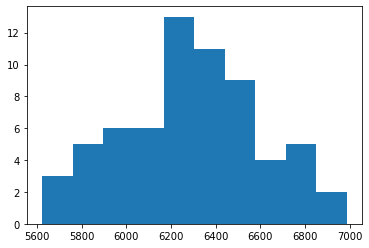

In [61]:
plt.hist(amd_new['<OPEN>'])

In [62]:
amd_new['volp']=pow((amd_new['<HIGH>']-amd_new['<LOW>']),2)
amd_new.shape

(64, 5)

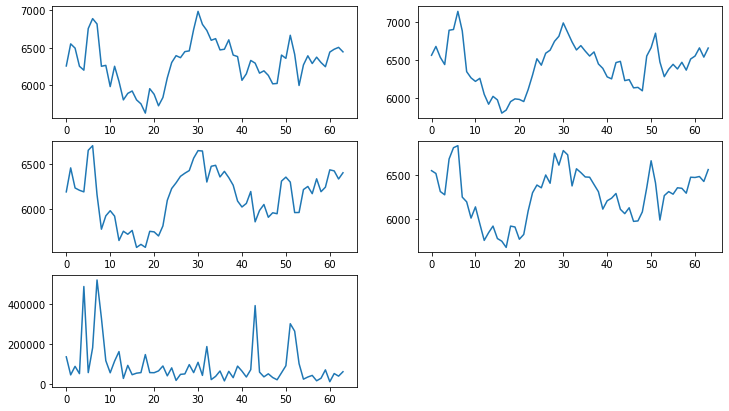

In [73]:
xcol=amd_new.columns.to_list()
plt.figure(figsize=(12, 7))
i = 1
for a in xcol:
    plt.subplot(3, 2, i)
    plt.plot(amd_new[a])
    i+=1

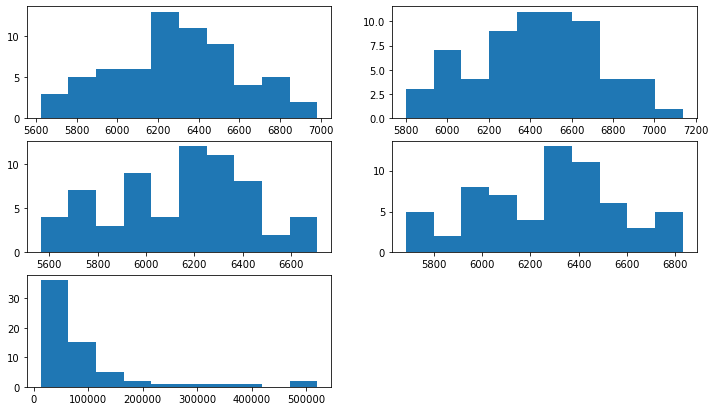

In [75]:
xcol=amd_new.columns.to_list()
plt.figure(figsize=(12, 7))
i = 1
for a in xcol:
    plt.subplot(3, 2, i)
    plt.hist(amd_new[a])
    i+=1